In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Анализ на резултатите от изпита на Programming Fundamentals with Python - май 2023


Разглеждаме резултатите от изпити на Programming Fundamentals with Python - май 2023 на софтуни.

В курса има 4 изпита:

- Regular Mid Exam

- Regular Final Exam

- Retake Mid Exam

- Retake Final Exam


## Цели на проекта

Целите на проекта са да разгледаме общото представяне на студентите, както и да класифицираме задачите по сложност. Това би ни помогнало да разберем какъв тип задачи са затруднили най-много студентите и да ни ориентира, че материала нужен за тяхното решаване има нужда от повече упражнения и практикуване. 

## Структура на данните и стъпки на проекта

Първичните данни на резултатите представляват 4 CSV файла, в които пътвите 3 колони са:
- № (Пореден номер в таблицата. Не ни носи никаква стойност, за това ще го махнем)
- User (Потребителско име, което е уникален идентификатор. Ще ги криптираме, за да не се четат, като просто заменим всеки символ със следващия в ascii таблицата.)
- Name (Име на студента. Не всички са попълнили имената си, така че за някои потребители няма запис. Освен това тази колона също не ни носи полезна информация, за това махаме и нея.)

Останалите колони съдържат точките, които студента е взел за съответната задача (числата от 0 до 100 или символа "-", ако тази задача не му се е паднала.)

Последната колона е "Total" която също ще премахнем, за да не ни пречи на обработката.

Тъй като имаме идентични обработки на множество файлове ще ползваме функции, чийто код ще преизползваме.

In [2]:
midexam = pd.read_csv('data/midexam.csv')
finalexam = pd.read_csv('data/finalexam.csv')
midexam_r = pd.read_csv('data/midexam_r.csv')
finalexam_r = pd.read_csv('data/finalexam_r.csv')


columns_to_remove = ['Total', '№', 'Name']
def drop_columns(df, columns_to_drop):
    return df.drop(columns_to_drop, axis=1)

midexam = drop_columns(midexam, columns_to_remove)
finalexam = drop_columns(finalexam, columns_to_remove)
midexam_r = drop_columns(midexam_r, columns_to_remove)
finalexam_r = drop_columns(finalexam_r, columns_to_remove)

In [3]:
def encrypt_string(encr):
    encrypted_string = ""
    for char in encr:
        ascii_code = ord(char)
        encrypted_ascii_code = ascii_code + 1
        encrypted_char = chr(encrypted_ascii_code)
        encrypted_string += encrypted_char
    return encrypted_string

midexam['User'] = midexam['User'].apply(encrypt_string)
finalexam['User'] = finalexam['User'].apply(encrypt_string)
midexam_r['User'] = midexam_r['User'].apply(encrypt_string)
finalexam_r['User'] = finalexam_r['User'].apply(encrypt_string)

In [4]:
finalexam

,User,01. Decrypting Commands,01. String Manipulator,02. Encrypting Password,03. Hero Recruitment,01. String Game,02. Message Translator,03. Followers,02. Boss Rush,03. Degustation Party,01. Hogwarts,02. Message Decrypter,03. Messages Manager,01. Password Validator,02. Easter Eggs,03. Dictionary,03. Wild Zoo
0,Ebwje2:893,-,-,-,-,100,100,-,-,-,-,-,-,-,-,-,100
1,qbwfm/qpqpw,-,-,-,-,-,-,-,-,100,100,-,-,-,100,-,-
2,Isjtup/kk,100,-,-,-,-,100,100,-,-,-,-,-,-,-,-,-
3,Spy1s,100,-,-,100,-,-,-,-,-,-,-,-,-,100,-,-
4,tupzbopw/mzvcp,-,-,-,-,-,100,-,-,100,-,-,-,100,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,npoj/hfobejfw,-,0,-,-,-,-,-,-,0,-,0,-,-,-,-,-
1729,Ofwfob2:99,-,-,-,-,0,-,-,-,-,-,-,0,-,0,-,-
1730,TupzboNH,0,-,0,-,-,-,-,-,-,-,-,-,-,-,0,-
1731,is2t:4,-,-,0,-,-,-,-,-,-,0,-,-,-,-,0,-


След като "изчистихме" нашите данни, за да ги приведем във вид, който е удобен за работа трябва да ги ънпивотнем, като за всеки User създадем запис със точките за съответната задача. 

Прави впечатление, че в името на всяка задача е номерът и ("01.", "02." или "03."). Създаваме колона "Task Number", в койято ще извадим и съхраняваме само номера на задачата.

Тъй като на всеки студент са се падали по точно 3 задачи, за точки на всички останали има стойност "-". Премахваме всички редове със тази стойност, защото това са задачи, които не са му се падали.

In [5]:

def unpivot_data(unp):
    unp = unp.melt(id_vars=['User'], value_vars=unp.columns[3:], var_name='Task', value_name='Points')
    unp['Task Number'] = unp['Task'].str.slice(0, 2) # extract the first 2 characters from Task
    unp = unp.replace('-', pd.NA) # replace '-' with NaN
    unp = unp.dropna() # drop rows with NaN
    unp = unp.reindex(columns=['User', 'Task Number', 'Task', 'Points']) # rearrange the columns
    return unp

# Извикване на функцията и промяна на DataFrame finalexam

midexam = unpivot_data(midexam)
finalexam = unpivot_data(finalexam)
midexam_r = unpivot_data(midexam_r)
finalexam_r = unpivot_data(finalexam_r)

In [6]:
finalexam

,User,Task Number,Task,Points
8,utwfufmjob/tijtinbopwb,02,02. Encrypting Password,100
18,HfpshjHfpshjfw:66,02,02. Encrypting Password,100
30,Jobulbub,02,02. Encrypting Password,100
33,njolpwtlb`w,02,02. Encrypting Password,100
50,Jncbtlbej,02,02. Encrypting Password,100
...,...,...,...,...
24224,jdp29:3,03,03. Wild Zoo,0
24231,LbuizLptupwb,03,03. Wild Zoo,0
24240,Dwfupnjs`Isj211epspw,03,03. Wild Zoo,0
24247,WmbejnjsLsbtjnjspwWbmfw,03,03. Wild Zoo,0


За да може да обобщим данните от четирите изпита ще ги съберем в един дейтафрейм, като добавим колона, която съдържа името на изпита.

In [7]:
midexam['Exam'] = 'midexam'
finalexam['Exam'] = 'finalexam'
midexam_r['Exam'] = 'midexam_r'
finalexam_r['Exam'] = 'finalexam_r'


all_exams = pd.concat([midexam, finalexam, midexam_r, finalexam_r], ignore_index=True)

all_exams['Points'] = all_exams['Points'].astype(int)
all_exams = all_exams.reindex(columns=['Exam', 'User', 'Task Number', 'Task', 'Points'])


In [8]:
all_exams

,Exam,User,Task Number,Task,Points
0,midexam,Hsjhpspw24,03,03. The Angry Cat,100
1,midexam,Epcz3821,03,03. The Angry Cat,100
2,midexam,HfpshjBoepopw14,03,03. The Angry Cat,100
3,midexam,vtvtvt,03,03. The Angry Cat,100
4,midexam,isjtup468,03,03. The Angry Cat,100
...,...,...,...,...,...
11238,finalexam_r,JmjbobEC,02,02. Arriving in Kathmandu,0
11239,finalexam_r,NjsptmbxCpodifw,02,02. Arriving in Kathmandu,0
11240,finalexam_r,w`Wfolpw,02,02. Arriving in Kathmandu,0
11241,finalexam_r,npmmpw8:,02,02. Arriving in Kathmandu,0


Вече можем да разгледаме средноаритметичната стойности на точките за всеки студент от всяка задача, за всеки един от изпитите.

In [9]:
exam_avg = all_exams.pivot_table(index='Exam', columns='Task Number', values='Points', aggfunc='mean')
exam_avg = exam_avg.applymap(lambda x: '{:.2f}'.format(x))

In [10]:
exam_avg

Task Number,01,02,03
Exam,,,
finalexam,82.09,79.81,79.67
finalexam_r,73.64,55.91,62.56
midexam,88.27,79.63,79.21
midexam_r,70.66,59.79,70.20


Нека разгледаме данните визуакно. 

Тук виждаме, че резултатите на редовните изпити са по-високи, отколкото на поправителните, което може да се каже, че е нормално.

Ако приемем, че поредният номер на сложността във възходящ ред отговаря на нейната сложност, това е в сила за първа задача, която за студентите е най-лесна. В сила е и за 2-ра и 3-та задача при редовните изпити, но за поправителните виждаме, че втората задача най-много е затруднила студентите.

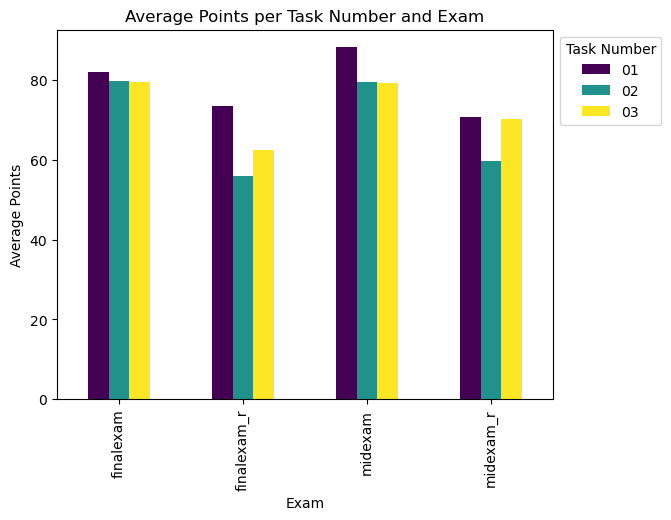

In [11]:
exam_avg = exam_avg.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

ax = exam_avg.plot(kind='bar', cmap='viridis')
# plt.legend(title='Task Number', loc='lower right')
plt.legend(title='Task Number', bbox_to_anchor=(1, 1))
plt.xlabel('Exam')
plt.ylabel('Average Points')
plt.title('Average Points per Task Number and Exam')
plt.show()

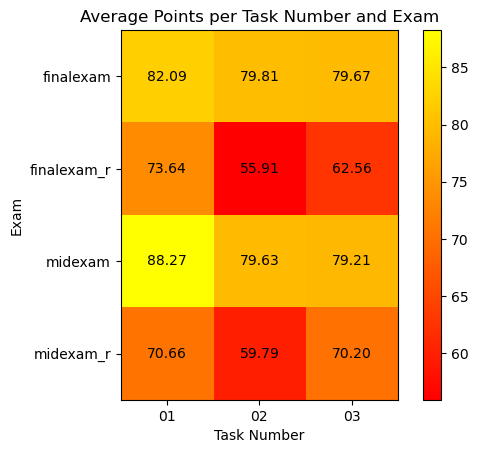

In [12]:
exam_matrix = exam_avg.applymap(float).values

plt.imshow(exam_matrix, cmap='autumn', interpolation='nearest')

plt.colorbar()

for i in range(len(exam_avg.index)):
    for j in range(len(exam_avg.columns)):
        plt.text(j, i, f'{exam_matrix[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Task Number')
plt.ylabel('Exam')

plt.yticks(range(len(exam_avg.index)), exam_avg.index)
plt.xticks(range(len(exam_avg.columns)), ['01', '02', '03']) 
plt.title('Average Points per Task Number and Exam')

plt.show()

Можем да разгледаме индивидуално средните резултати за всяка от задачите за конкретен изпит, както и представянето ѝ, спрямо средния резултат.

In [13]:
finalexam['Points'] = finalexam['Points'].astype(int) # convert Points to integer
finalexam_avg = finalexam.groupby('Task')['Points'].mean().reset_index() #Average Points by Task

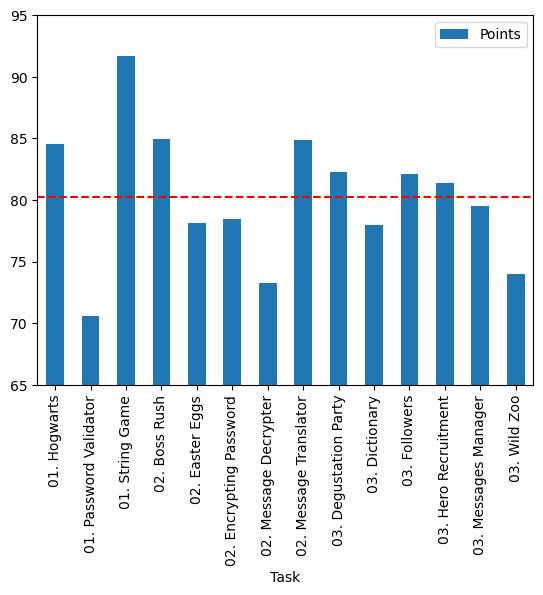

In [15]:
finalexam_avg.plot(x='Task', y='Points', kind='bar') 
mean_points = finalexam_avg['Points'].mean() # calculate the mean of Points
plt.ylim(65, 95)
plt.axhline(y=mean_points, color='red', linestyle='--') # draw a horizontal line at the mean value
plt.show() # show the plot

## Резултати на студенти.
Нека съберем резултатите на редовния изпит, за да видим колко точки общо са получили

In [ ]:
finalexam['Points'] = finalexam['Points'].astype(int) # convert Points to integer
s_finalexam = finalexam.groupby('User')['Points'].sum().reset_index() #Average Points by Task
s_finalexam = s_finalexam.sort_values(by='Points', ascending=False) # sort by Points in descending order

s_midexam = finalexam.groupby('User')['Points'].sum().reset_index() #Average Points by Task
s_midexam = s_midexam.sort_values(by='Points', ascending=False) # sort by Points in descending order

In [ ]:
regularexam = pd.concat([s_finalexam, s_midexam]).groupby('User')['Points'].sum().reset_index()
regularexam = regularexam.sort_values(by='Points', ascending=False)

In [ ]:
regularexam

Нека ги групираме на следните бинове -1, 0, 200, 400, 500, 599, 600

In [ ]:
bins = [-1, 0, 200, 400, 500, 599, 600]

regularexam['Points_Group'] = pd.cut(regularexam['Points'], bins=bins)
result = regularexam.groupby('Points_Group')['User'].count().reset_index()
result.columns = ['Points_Range', 'User_Count']
print(result)

По този начин можем да видим какъв брой студенти в кои групи попадат

In [ ]:
result['Points_Range'] = result['Points_Range'].astype(str)

plt.figure(figsize=(8, 6))
plt.bar(result['Points_Range'], result['User_Count'], color='skyblue')
plt.xlabel('Points interval')
plt.ylabel('Users Count')
plt.title('Users count in intervals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Заключение
Ползата от подобен проект е, че би могъл да даде представа на студентите как се представят самите те, на базата на останалите. Може да им покаже какъв тип задачи има нужда да упражнят повече. 

Същата индормация би могла да бъде интересна и за преподаватели

Проекта би показал информация за друго издание на курса бързо и лесно само със смяна на файловете с входни данни.

# Източници:
judge.softuni.org